In [ ]:
# !pip install tensorflow
# !pip install matplotlib
# !pip install numpy
# !pip install panda

                                                   
                                                   Importing the Libraries



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense




Loading the Data from the fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

                                       Getting the data

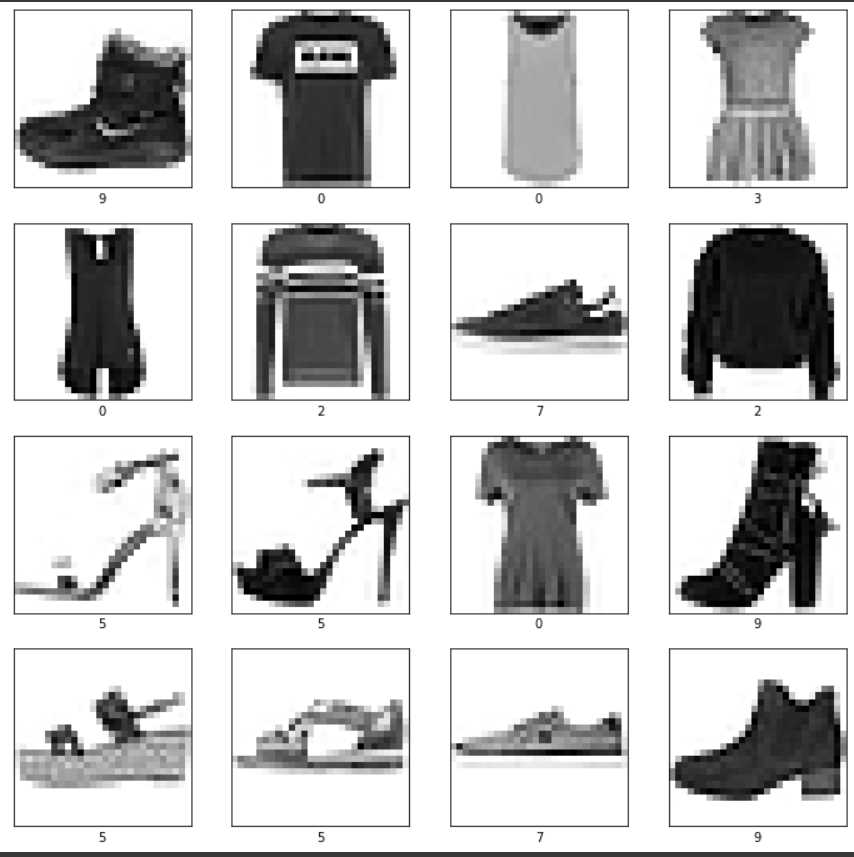

In [ ]:
plt.figure(figsize=(12,12))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])

plt.show()
# print(x_train)
# print("Train X=%s,Y=%s",(x_train.shape,x_test.shape))
# print("Train X=%s,Y=%s",(y_train.shape,y_test.shape))
# # ppt.imshow(x_train[0])
# # ppt.title('Class: {}'.format(x_test[0]))
# # ppt.figure()

Normalize images by dividing pixels by 255


In [ ]:
# Normalization
x_train = x_train/255
x_test = x_test/255
# x_train[0]

In [ ]:
x_train.shape

In [ ]:
x_train = x_train[:10000,:,:]
x_test = x_test[:3000,:,:]
y_train = y_train[:10000]
y_test = y_test[:3000]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# Reshape the training and Test data

x_train = x_train.reshape(10000,28,28,1)
x_test = x_test.reshape(3000,28,28,1)
print(x_train.shape)


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D

                                                        
                                                        Building the CNN Model

In [ ]:
# Build the CNN Model
model = Sequential()
model.add(Conv2D(64,(3,3),strides=1,activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=1))
model.add(Conv2D(64,(3,3),strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=1))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


                         Executing the model for 100 Epochs
                            Final Epoch Test 

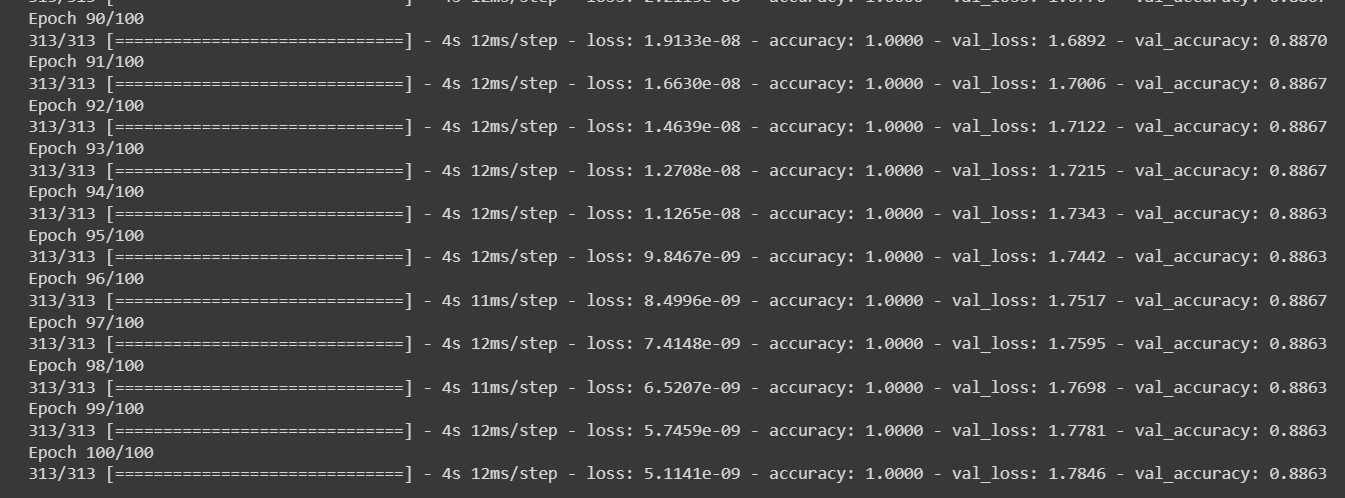

In [ ]:
h1 = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))


In [ ]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

                                Depict loss vs. val_loss on line chart
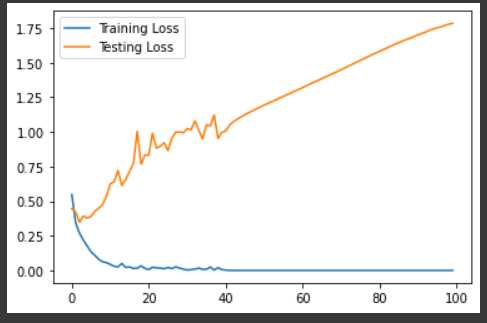

In [ ]:
plt.plot(r1['Epochs'],r1['loss'],label='Training Loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing Loss')
plt.legend()
plt.show()

                     Depict accuracy vs. val_accuracy on line chart.

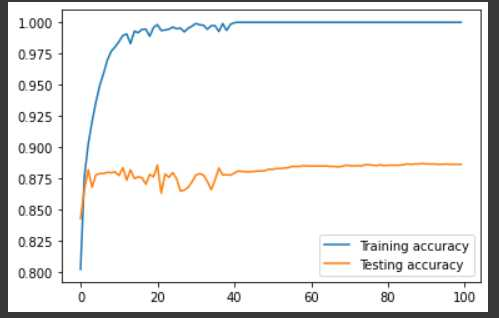

In [ ]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training accuracy')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing accuracy')
plt.legend()
plt.show()

Generate predictions on test_data

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

In [ ]:
y_pred1 = [np.argmax(i) for i in y_pred]
print(y_pred1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

                    Compute Confusion matrix and classification report

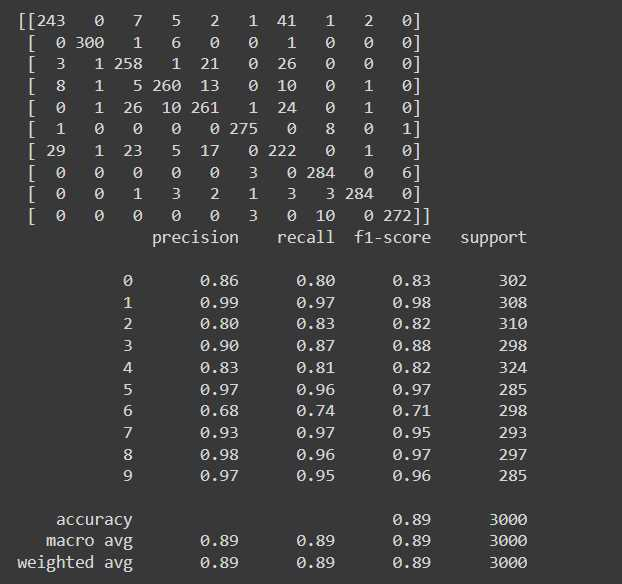


In [ ]:
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
